## י 📌 רגרסיית עצים $(Regression Trees)$ – מבוא מפורט י  

## **📌 י מבוא י**  
י רגרסיית עצים $(Regression Trees)$ היא שיטה ללמידת מכונה ולניתוח נתונים, בה הנתונים מחולקים **באופן היררכי** על בסיס ערכים של המשתנים הבלתי תלויים. י  
י המטרה היא לבנות **מבנה עץ** שמאפשר לבצע חיזוי מדויק על ידי **חלוקה אופטימלית של המרחב**. י  

📌 **י היתרון המרכזי של רגרסיית עצים:** י  
- י אינה דורשת הנחות על צורת הקשר בין המשתנים. י  
- י מספקת ניתוח **אינטואיטיבי וקל להבנה** של הקשרים בנתונים. י  
- י מאפשרת **זיהוי משתנים חשובים** ומשפרת ביצועים על ידי התאמת מודל לא ליניארי. י  

---

## **📌 י בניית עץ רגרסיה י**  
### **י 1️⃣ שלב ראשון – חלוקת הנתונים לאזורים $R_m$ י**  
י נניח כי יש לנו **מדגם של $n$ תצפיות**, עם **$p$ משתנים בלתי תלויים** $x = (x_1, x_2, ..., x_p)$ ומשתנה תגובה $y$. י  

י אנו מחלקים את מרחב המשתנים ל-$M$ תת-אזורים **$R_1, R_2, ..., R_M$**, כך שבכל אזור אנו מניחים כי המשתנה התלוי **קבוע** ומוערך כ-: י  

$$
\hat{f}(x) = \sum_{m=1}^{M} c_m I(x \in R_m)
$$

י כאשר: י  
- **י $c_m$** הוא הממוצע של $y$ בכל אזור $R_m$. י  
- **י $I(x \in R_m)$** היא פונקציה שמציינת האם $x$ נמצא באזור זה. י  

🔹 **י המטרה:** י  
למצוא את $R_m$ כך שטעות הריבועים הכוללת $(RSS)$ מינימלית: י  

$$
RSS = \sum_{i=1}^{n} (y_i - \hat{f}(x_i))^2
$$

---

## **📌 י 2️⃣ אלגוריתם גרידי $(Greedy Algorithm)$ לחלוקת העץ י**  
י האלגוריתם מחפש **את החיתוך הטוב ביותר בנתונים** באופן איטרטיבי. י  

- י מחלקים את הנתונים לפי **משתנה $j$** ונקודת חיתוך $s$: י  

$$
R_1(j, s) = \{X | X_j \leq s\}, \quad R_2(j, s) = \{X | X_j > s\}
$$

- י בוחרים את **החיתוך שמפחית את $RSS$ בצורה המקסימלית**: י  

$$
\min_{j, s} \left[ \min_{c_1} \sum_{x_i \in R_1(j,s)} (y_i - c_1)^2 + \min_{c_2} \sum_{x_i \in R_2(j,s)} (y_i - c_2)^2 \right]
$$

י כאשר **$c_1$ ו- $c_2$** הם ממוצעי הערכים בכל אזור. י  

---

## **📌 י 3️⃣ עצירת תהליך החלוקה – מתי מפסיקים לגדל את העץ? י**  
- **י אם כל קבוצה מכילה פחות מ-5 תצפיות. י**  
- **י אם לא ניתן לשפר משמעותית את $RSS$ על ידי פיצול נוסף. י**  
- **י אם עומדים בקריטריון עצירה מסוים (כגון עומק מקסימלי). י**  

📌 **י בעיה:** י  
- **י עץ גדול מדי → $Overfitting$ (למידת יתר). י**  
- **י עץ קטן מדי → $Underfitting$ (למידת חסר). י**  

---

## **📌 י 4️⃣ גיזום עץ $(Pruning)$ עם $Cost Complexity Pruning$ י**  
י כדי לשלוט במורכבות העץ ולמנוע $Overfitting$, אנו מבצעים **גיזום $(Pruning)$**. י  

י גיזום יכול לקרות רק מלמטה למעלה. י  
### **🔹 י פרמטר גיזום – $\alpha$ י**  
י אנו מגדירים **קריטריון מורכבות**: י  

$$
C_\alpha (T) = \sum_{m=1}^{|T|} N_m Q_m(T) + \alpha |T|
$$

י כאשר: י  
- **י $|T|$** – מספר העלים בעץ. י  
- **י $N_m$** – מספר התצפיות בכל עלה. י  
- **י $Q_m(T)$** – $RSS$ בכל עלה. י  
- **י $\alpha$** – פרמטר גיזום השולט על הסחר בין **מורכבות העץ לדיוק**. י  

📌 **י כיצד לבחור $\alpha$? י**  
- י מבצעים **קרוס-ולידציה** עם ערכים שונים של $\alpha$. י  
- י בוחרים את $\alpha$ שממזער את ה-$MSE$ על סט אימון ובדיקה. י  

---

## **📌 י דוגמה – בניית עץ רגרסיה עם $Python$ י**  


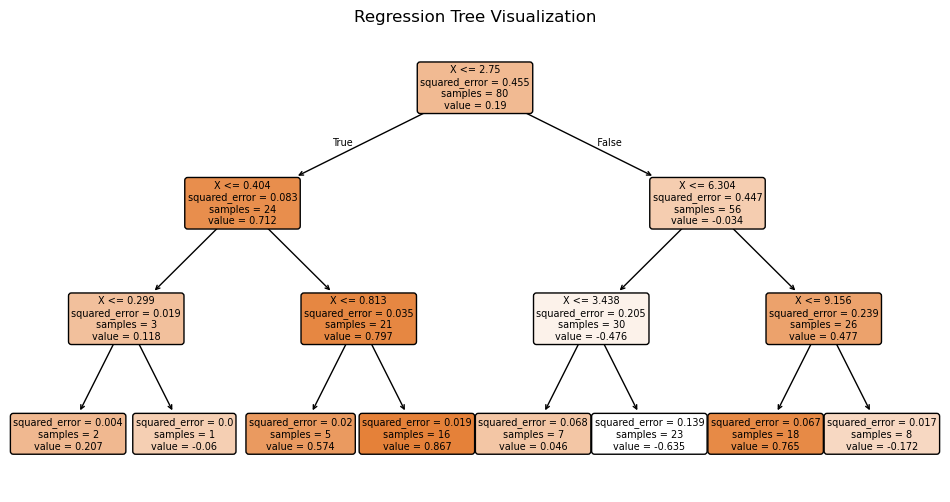

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

# יצירת נתונים סינתטיים
np.random.seed(42)
X = np.sort(10 * np.random.rand(100, 1), axis=0)
Y = np.sin(X).ravel() + np.random.randn(100) * 0.2  # רעש נוסף

# חלוקת הנתונים לסט אימון ובדיקה
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# בניית עץ רגרסיה
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, Y_train)

# חיזוי והערכת ביצועים
Y_pred = tree.predict(X_test)

# ציור העץ
plt.figure(figsize=(12,6))
plot_tree(tree, filled=True, feature_names=["X"], rounded=True)
plt.title("Regression Tree Visualization")
plt.show()


## י 📌 5️⃣ $Cross-Validation$ לבחירת גודל עץ אופטימלי י  

## **📌 י מדוע צריך לבחור גודל עץ אופטימלי? י**  
י כאשר אנו בונים עץ רגרסיה, עומק העץ משפיע באופן ישיר על **יכולת החיזוי** שלו: י  
- **י עץ רדוד מדי** (קטן) עלול **לא לזהות מגמות חשובות** בנתונים $(Underfitting)$. י  
- **י עץ עמוק מדי** עלול **ללמוד את הרעש בנתונים** ולבצע $Overfitting$. י  

📌 **י השאלה היא – כיצד למצוא את גובה העץ $(Depth)$ שנותן את הביצועים הטובים ביותר? י**  
י לשם כך, אנו משתמשים ב-**$Cross-Validation$ (קרוס-ולידציה)**. י  

---

## **📌 י מהי קרוס-ולידציה $(Cross-Validation)$? י**  
י $Cross-Validation$ היא טכניקה שמחלקת את הנתונים ל- **$k$** תתי-מדגמים, י  
י כאשר בכל שלב אנו **מאמנים את המודל על $k-1$ קבוצות** ובודקים את הדיוק על הקבוצה האחרונה. י  

🔹 **י $Cross-Validation$ מסייעת לנו לבחור את עומק העץ הטוב ביותר כך שיתאים היטב לנתונים. י**  
🔹 **י המדד שמשמש לבדיקת האיכות הוא שגיאת הריבועים הממוצעת $(Mean Squared Error - MSE)$. י**  

---

## **📌 י אלגוריתם קרוס-ולידציה לבחירת עומק עץ י**  
1. י נגדיר טווח ערכים עבור **עומק העץ** (למשל, בין 1 ל-10). י  
2. י עבור כל עומק עץ נבצע **$Cross-Validation$**: י  
   - י נאמן את המודל על חלק מהנתונים. י  
   - י נבדוק את ביצועיו על סט הבדיקה. י  
   - י נחשב את ה-$MSE$ הממוצע. י  
3. י נבחר את **עומק העץ שנותן את שגיאת החיזוי הנמוכה ביותר**. י  

---

## **📌 י קוד לביצוע קרוס-ולידציה על גובה העץ י**  


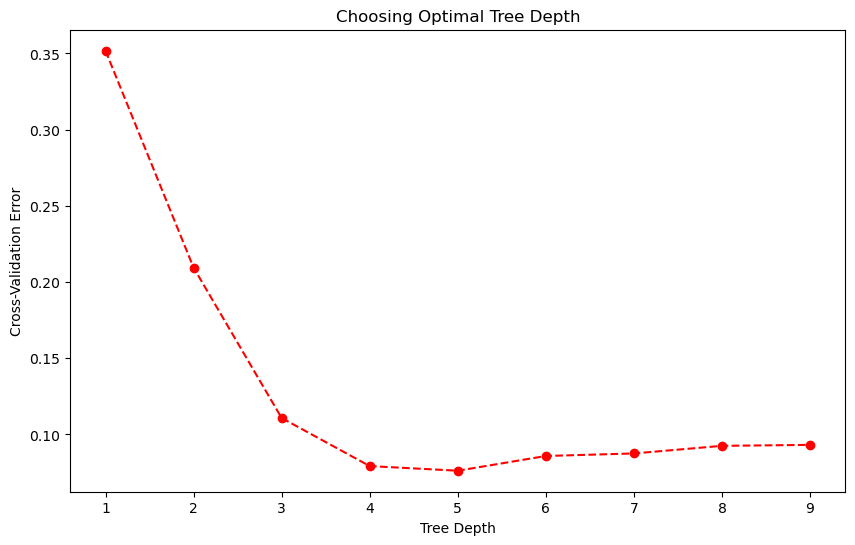

In [9]:
from sklearn.model_selection import cross_val_score

# חיפוש גודל עץ אופטימלי
depths = range(1, 10)
cv_scores = [cross_val_score(DecisionTreeRegressor(max_depth=d), X_train, Y_train, cv=5, scoring="neg_mean_squared_error").mean() for d in depths]

# הצגת ביצועים עבור כל גובה עץ
plt.figure(figsize=(10,6))
plt.plot(depths, np.abs(cv_scores), marker="o", linestyle="dashed", color="red")
plt.xlabel("Tree Depth")
plt.ylabel("Cross-Validation Error")
plt.title("Choosing Optimal Tree Depth")
plt.show()